In [36]:
import numpy as np
from matplotlib.pyplot import cm
import matplotlib.pyplot as plt
import time
from matplotlib.animation import FuncAnimation
from IPython import display
import random
import statistics as stat
%run Backend_Retrieval.ipynb

In [37]:
####################################################################
#          PARAMS
####################################################################
start_time=time.perf_counter()

L= 500        
steps_setup= 100               
splim = 15


des_speed=splim    
des_speed_inv=1/splim     
del_t= 0.1                   
acc_exp= 4                  
time_gap= 1               
min_gap= 2                  
comf_decel= 1.5               
acc_max= 1                 
length = 2                                          
 

#Parameter set-up
params=[]
params.append(des_speed_inv)
params.append(acc_exp)
params.append(time_gap)
params.append(comf_decel)
params.append(min_gap)
params.append(acc_max)
params.append(del_t)
params.append(length)
params.append(L)
####################################################################
#          PARAMETER SUMMARY
####################################################################
#  SETUP:
# acc exponent  = 4
# time_gap      = 1
# min space gap = 2
# comf decel    = 1.5
# max accel     = 1
# car length    = 2
####################################################################

In [38]:
steps = 2000
start = 1
stop = 150

In [39]:
####################################################################
#          BASIC SIMULATION COLLECTING GLOBAL METRICS
####################################################################
#  SETUP:
# iterating 1 to 150 cars, well past jam point
# 1000 steps at 0.1 secs easliy enough time to reach equilibrium with evnly spaced cars
# Road length 500 with all cars evenly spaced
# 15 m/s speed limit
####################################################################
steps = 1000
start = 1
stop = 150
flow_global_list = np.zeros((stop-1,steps))
dens_global = np.zeros(stop-1)
avg_vel_global = []
for N in range(start,stop):
    caravvel = []
    vel= np.zeros(N)     
    pos = np.zeros(N)
    #start = np.linspace(0,400,N)
    for j in range(N):
        pos[j]=j*(L/N)       
    acc= np.zeros(N)      
    headway = np.zeros(N)
    dv = np.zeros(N)
    for i in range(N):
        DisGap = 0
        if i+1!=N:
            if pos[i]>(pos[i+1]-length):
                DisGap = (pos[i+1]-length-pos[i]+L)
            elif pos[i]<(pos[i+1]-length):
                DisGap = (pos[i+1]-length-pos[i])
            dv[i] = vel[i]-vel[i+1]
        else:
            if pos[i]>(pos[0]-length):
                DisGap = (pos[0]-length-pos[i]+L)
            else:
                DisGap = (pos[0]-length-pos[i])
            dv[i] = vel[i]-vel[0]
        headway[i] = DisGap
    posnew= np.zeros(N)        
    velnew= np.zeros(N)
    time_pass=0
    
    for i in range(steps):
        posnew, velnew, acc = upd_pos_vel(N, pos, vel, acc, headway, dv, posnew, velnew, params)
        
        pos, vel, headway, dv = update_cars(N, pos, vel, posnew, velnew, headway, dv, params)
        
        den,flo = flow_global(N,vel,L)
        dens_global[N-1] = den
        flow_global_list[N-1,i] = flo
        caravvel.append(vel[0])
        count = 0
        for n in range(N):
            count += vel[n]
        caravvel.append(count/N)    
        time_pass+=del_t
       
    avg_vel_global.append(caravvel[900])   
    print(f'{N} completed')
    
x_dens = []
for x in dens_global:
    x_dens.append(x*L)
fundamentalfig, axs = plt.subplots(2,2)
fundamentalfig.set_facecolor('orange')
axs[0,0].plot(x_dens,flow_global_list[:,900])
axs[0,0].set_ylabel('Global Flow (cars/hr)')
axs[1,0].plot(x_dens,avg_vel_global)
axs[1,0].set_xlabel('Global Density (cars/km)')
axs[1,0].set_ylabel('Average Speed (m/s)')
axs[1,1].plot(flow_global_list[:,900], avg_vel_global)
axs[1,1].set_xlabel('Global Flow (cars/hr)')
axs[0,1].axis('off')

1 completed
2 completed
3 completed
4 completed
5 completed
6 completed
7 completed
8 completed
9 completed
10 completed
11 completed
12 completed
13 completed
14 completed
15 completed
16 completed
17 completed
18 completed
19 completed
20 completed
21 completed
22 completed
23 completed
24 completed
25 completed
26 completed
27 completed
28 completed
29 completed
30 completed
31 completed
32 completed
33 completed
34 completed
35 completed
36 completed
37 completed
38 completed
39 completed
40 completed
41 completed
42 completed
43 completed
44 completed
45 completed
46 completed
47 completed
48 completed
49 completed
50 completed
51 completed
52 completed
53 completed
54 completed
55 completed
56 completed
57 completed
58 completed
59 completed
60 completed
61 completed
62 completed
63 completed
64 completed
65 completed
66 completed
67 completed


KeyboardInterrupt: 

In [ ]:
def low_stdv_find(lst, rang):
    track = []
    track2 = []
    for i in range(len(lst)-rang):
        track.append(stat.stdev(lst[i:i+rang]))
        track2.append(i)
    ident = track2[track.index(min(track))]
    return lst[ident:ident+rang]

In [ ]:
####################################################################
#          PARAMS
####################################################################
start_time=time.perf_counter()

L= 700        
steps_setup= 100               
splim = 15


des_speed=splim    
des_speed_inv=1/splim     
del_t= 0.1                   
acc_exp= 4                  
time_gap= 1               
min_gap= 2                  
comf_decel= 1.5               
acc_max= 1                 
length = 2                                          
 

#Parameter set-up
params=[]
params.append(des_speed_inv)
params.append(acc_exp)
params.append(time_gap)
params.append(comf_decel)
params.append(min_gap)
params.append(acc_max)
params.append(del_t)
params.append(length)
params.append(L)
####################################################################
#          PARAMETER SUMMARY
####################################################################
#  SETUP:
# acc exponent  = 4
# time_gap      = 1
# min space gap = 2
# comf decel    = 1.5
# max accel     = 1
# car length    = 2
##################################################################

In [45]:
####################################################################
#   BASIC SIMULATION COLLECTING GLOBAL METRICS AND ITTERATING PARAMS
####################################################################
#  SETUP:
# iterating 1 to 150 cars, normally well past jam point
# 1000 steps at 0.1 secs 
# Road length 625m(force jam) with all cars starting even distance in first 600m
# 15 m/s speed limit
####################################################################
#  PARAMS TO ITERATE OVER:
# acc exponent
# min distance(safety gap)
# comf decel
# max acel
####################################################################


# PLAN:

# RUN BASIC SIM AS ABOVE OVER 100 VALUES OF DESIRED PARAM(FIRST ACC EXPONENT)

# SAVE RESULTS IN 3x150x100 MATRIX OUTSIDE TRIPLE NESTED FOR LOOP PREPPED FOR PLOTTING

# PLOT 50 EVENLY SPACED VALUES ON FUNDAMENTAL DIAGRAMS

# INSIDE SIM:

# DETERMINE SET OF 100 VALS IN global_flow_list[N,:] WITH LOWEST STANDARD DEVIATION AND AVERAGE THIS
# USE THIS VALUE IN SAVE RESULTS MATRIX,,,,,,100 vals used after observing behaviour of flow at fixed density

# COMPARE FINAL DATA OF PARAM WITH COVARIANCE

####################################################################
acc_exp_itter = np.linspace(1,6,10)
ind = -1
L = 700
AccExp_Variation = np.zeros((2,299,10))

for xx in acc_exp_itter:
    ind += 1
    params[1] = xx
    start = 1
    stop = 150
    #flow_global_list = np.zeros(stop-1,)
    #dens_global = np.zeros(stop-1)
    #avg_vel_global = []
    for N in range(1,300):
        carflow = []
        caravvel = []
        vel= np.zeros(N)     
        pos = np.zeros(N)
        start = np.linspace(0,600,N)
        for j in range(N):
            pos[j]=start[j]       
        acc= np.zeros(N)      
        headway = np.zeros(N)
        dv = np.zeros(N)
        for i in range(N):
            DisGap = 0
            if i+1!=N:
                if pos[i]>(pos[i+1]-length):
                    DisGap = (pos[i+1]-length-pos[i]+L)
                elif pos[i]<(pos[i+1]-length):
                    DisGap = (pos[i+1]-length-pos[i])
                dv[i] = vel[i]-vel[i+1]
            else:
                if pos[i]>(pos[0]-length):
                    DisGap = (pos[0]-length-pos[i]+L)
                else:
                    DisGap = (pos[0]-length-pos[i])
                dv[i] = vel[i]-vel[0]
            headway[i] = DisGap
        posnew= np.zeros(N)        
        velnew= np.zeros(N)
        time_pass=0

        for i in range(steps):
            if i%500==0:
                print(f'step {i}')
            
            posnew, velnew, acc = upd_pos_vel(N, pos, vel, acc, headway, dv, posnew, velnew, params)

            pos, vel, headway, dv = update_cars(N, pos, vel, posnew, velnew, headway, dv, params)

            den,flo = flow_global(N,vel,L)
            #dens_global[N-1] = den
            carflow.append(flo)
            count = 0
            for n in range(N):
                count += vel[n]
            caravvel.append(count/N)    
            time_pass+=del_t
    
        eq_flow = low_stdv_find(carflow,100)
        AccExp_Variation[0,N-1,ind] = stat.mean(eq_flow)
        
        eq_vel = low_stdv_find(caravvel,100)
        AccExp_Variation[1,N-1,ind] = stat.mean(eq_vel)
           
        print(f'{N} completed')
    print(f'{ind} PARAM VARIO COMPILED')

np.save('Data Storage\Varying Acceleration Exponent 4', AccExp_Variation)

step 0
step 500
1 completed
step 0
step 500
2 completed
step 0
step 500
3 completed
step 0
step 500
4 completed
step 0
step 500
5 completed
step 0
step 500
6 completed
step 0
step 500
7 completed
step 0
step 500
8 completed
step 0
step 500
9 completed
step 0
step 500
10 completed
step 0
step 500
11 completed
step 0
step 500
12 completed
step 0
step 500
13 completed
step 0
step 500
14 completed
step 0
step 500
15 completed
step 0
step 500
16 completed
step 0
step 500
17 completed
step 0
step 500
18 completed
step 0
step 500
19 completed
step 0
step 500
20 completed
step 0
step 500
21 completed
step 0
step 500
22 completed
step 0
step 500
23 completed
step 0
step 500
24 completed
step 0
step 500
25 completed
step 0
step 500
26 completed
step 0
step 500
27 completed
step 0
step 500
28 completed
step 0
step 500
29 completed
step 0
step 500
30 completed
step 0
step 500
31 completed
step 0
step 500
32 completed
step 0
step 500
33 completed
step 0
step 500
34 completed
step 0
step 500
35 comp

278 completed
step 0
step 500
279 completed
step 0
step 500
280 completed
step 0
step 500
281 completed
step 0
step 500
282 completed
step 0
step 500
283 completed
step 0
step 500
284 completed
step 0
step 500
285 completed
step 0
step 500
286 completed
step 0
step 500
287 completed
step 0
step 500
288 completed
step 0
step 500
289 completed
step 0
step 500
290 completed
step 0
step 500
291 completed
step 0
step 500
292 completed
step 0
step 500
293 completed
step 0
step 500
294 completed
step 0
step 500
295 completed
step 0
step 500
296 completed
step 0
step 500
297 completed
step 0
step 500
298 completed
step 0
step 500
299 completed
0 PARAM VARIO COMPILED
step 0
step 500
1 completed
step 0
step 500
2 completed
step 0
step 500
3 completed
step 0
step 500
4 completed
step 0
step 500
5 completed
step 0
step 500
6 completed
step 0
step 500
7 completed
step 0
step 500
8 completed
step 0
step 500
9 completed
step 0
step 500
10 completed
step 0
step 500
11 completed
step 0
step 500
12 comp

255 completed
step 0
step 500
256 completed
step 0
step 500
257 completed
step 0
step 500
258 completed
step 0
step 500
259 completed
step 0
step 500
260 completed
step 0
step 500
261 completed
step 0
step 500
262 completed
step 0
step 500
263 completed
step 0
step 500
264 completed
step 0
step 500
265 completed
step 0
step 500
266 completed
step 0
step 500
267 completed
step 0
step 500
268 completed
step 0
step 500
269 completed
step 0
step 500
270 completed
step 0
step 500
271 completed
step 0
step 500
272 completed
step 0
step 500
273 completed
step 0
step 500
274 completed
step 0
step 500
275 completed
step 0
step 500
276 completed
step 0
step 500
277 completed
step 0
step 500
278 completed
step 0
step 500
279 completed
step 0
step 500
280 completed
step 0
step 500
281 completed
step 0
step 500
282 completed
step 0
step 500
283 completed
step 0
step 500
284 completed
step 0
step 500
285 completed
step 0
step 500
286 completed
step 0
step 500
287 completed
step 0
step 500
288 comple

232 completed
step 0
step 500
233 completed
step 0
step 500
234 completed
step 0
step 500
235 completed
step 0
step 500
236 completed
step 0
step 500
237 completed
step 0
step 500
238 completed
step 0
step 500
239 completed
step 0
step 500
240 completed
step 0
step 500
241 completed
step 0
step 500
242 completed
step 0
step 500
243 completed
step 0
step 500
244 completed
step 0
step 500
245 completed
step 0
step 500
246 completed
step 0
step 500
247 completed
step 0
step 500
248 completed
step 0
step 500
249 completed
step 0
step 500
250 completed
step 0
step 500
251 completed
step 0
step 500
252 completed
step 0
step 500
253 completed
step 0
step 500
254 completed
step 0
step 500
255 completed
step 0
step 500
256 completed
step 0
step 500
257 completed
step 0
step 500
258 completed
step 0
step 500
259 completed
step 0
step 500
260 completed
step 0
step 500
261 completed
step 0
step 500
262 completed
step 0
step 500
263 completed
step 0
step 500
264 completed
step 0
step 500
265 comple

209 completed
step 0
step 500
210 completed
step 0
step 500
211 completed
step 0
step 500
212 completed
step 0
step 500
213 completed
step 0
step 500
214 completed
step 0
step 500
215 completed
step 0
step 500
216 completed
step 0
step 500
217 completed
step 0
step 500
218 completed
step 0
step 500
219 completed
step 0
step 500
220 completed
step 0
step 500
221 completed
step 0
step 500
222 completed
step 0
step 500
223 completed
step 0
step 500
224 completed
step 0
step 500
225 completed
step 0
step 500
226 completed
step 0
step 500
227 completed
step 0
step 500
228 completed
step 0
step 500
229 completed
step 0
step 500
230 completed
step 0
step 500
231 completed
step 0
step 500
232 completed
step 0
step 500
233 completed
step 0
step 500
234 completed
step 0
step 500
235 completed
step 0
step 500
236 completed
step 0
step 500
237 completed
step 0
step 500
238 completed
step 0
step 500
239 completed
step 0
step 500
240 completed
step 0
step 500
241 completed
step 0
step 500
242 comple

186 completed
step 0
step 500
187 completed
step 0
step 500
188 completed
step 0
step 500
189 completed
step 0
step 500
190 completed
step 0
step 500
191 completed
step 0
step 500
192 completed
step 0
step 500
193 completed
step 0
step 500
194 completed
step 0
step 500
195 completed
step 0
step 500
196 completed
step 0
step 500
197 completed
step 0
step 500
198 completed
step 0
step 500
199 completed
step 0
step 500
200 completed
step 0
step 500
201 completed
step 0
step 500
202 completed
step 0
step 500
203 completed
step 0
step 500
204 completed
step 0
step 500
205 completed
step 0
step 500
206 completed
step 0
step 500
207 completed
step 0
step 500
208 completed
step 0
step 500
209 completed
step 0
step 500
210 completed
step 0
step 500
211 completed
step 0
step 500
212 completed
step 0
step 500
213 completed
step 0
step 500
214 completed
step 0
step 500
215 completed
step 0
step 500
216 completed
step 0
step 500
217 completed
step 0
step 500
218 completed
step 0
step 500
219 comple

163 completed
step 0
step 500
164 completed
step 0
step 500
165 completed
step 0
step 500
166 completed
step 0
step 500
167 completed
step 0
step 500
168 completed
step 0
step 500
169 completed
step 0
step 500
170 completed
step 0
step 500
171 completed
step 0
step 500
172 completed
step 0
step 500
173 completed
step 0
step 500
174 completed
step 0
step 500
175 completed
step 0
step 500
176 completed
step 0
step 500
177 completed
step 0
step 500
178 completed
step 0
step 500
179 completed
step 0
step 500
180 completed
step 0
step 500
181 completed
step 0
step 500
182 completed
step 0
step 500
183 completed
step 0
step 500
184 completed
step 0
step 500
185 completed
step 0
step 500
186 completed
step 0
step 500
187 completed
step 0
step 500
188 completed
step 0
step 500
189 completed
step 0
step 500
190 completed
step 0
step 500
191 completed
step 0
step 500
192 completed
step 0
step 500
193 completed
step 0
step 500
194 completed
step 0
step 500
195 completed
step 0
step 500
196 comple

140 completed
step 0
step 500
141 completed
step 0
step 500
142 completed
step 0
step 500
143 completed
step 0
step 500
144 completed
step 0
step 500
145 completed
step 0
step 500
146 completed
step 0
step 500
147 completed
step 0
step 500
148 completed
step 0
step 500
149 completed
step 0
step 500
150 completed
step 0
step 500
151 completed
step 0
step 500
152 completed
step 0
step 500
153 completed
step 0
step 500
154 completed
step 0
step 500
155 completed
step 0
step 500
156 completed
step 0
step 500
157 completed
step 0
step 500
158 completed
step 0
step 500
159 completed
step 0
step 500
160 completed
step 0
step 500
161 completed
step 0
step 500
162 completed
step 0
step 500
163 completed
step 0
step 500
164 completed
step 0
step 500
165 completed
step 0
step 500
166 completed
step 0
step 500
167 completed
step 0
step 500
168 completed
step 0
step 500
169 completed
step 0
step 500
170 completed
step 0
step 500
171 completed
step 0
step 500
172 completed
step 0
step 500
173 comple

117 completed
step 0
step 500
118 completed
step 0
step 500
119 completed
step 0
step 500
120 completed
step 0
step 500
121 completed
step 0
step 500
122 completed
step 0
step 500
123 completed
step 0
step 500
124 completed
step 0
step 500
125 completed
step 0
step 500
126 completed
step 0
step 500
127 completed
step 0
step 500
128 completed
step 0
step 500
129 completed
step 0
step 500
130 completed
step 0
step 500
131 completed
step 0
step 500
132 completed
step 0
step 500
133 completed
step 0
step 500
134 completed
step 0
step 500
135 completed
step 0
step 500
136 completed
step 0
step 500
137 completed
step 0
step 500
138 completed
step 0
step 500
139 completed
step 0
step 500
140 completed
step 0
step 500
141 completed
step 0
step 500
142 completed
step 0
step 500
143 completed
step 0
step 500
144 completed
step 0
step 500
145 completed
step 0
step 500
146 completed
step 0
step 500
147 completed
step 0
step 500
148 completed
step 0
step 500
149 completed
step 0
step 500
150 comple

94 completed
step 0
step 500
95 completed
step 0
step 500
96 completed
step 0
step 500
97 completed
step 0
step 500
98 completed
step 0
step 500
99 completed
step 0
step 500
100 completed
step 0
step 500
101 completed
step 0
step 500
102 completed
step 0
step 500
103 completed
step 0
step 500
104 completed
step 0
step 500
105 completed
step 0
step 500
106 completed
step 0
step 500
107 completed
step 0
step 500
108 completed
step 0
step 500
109 completed
step 0
step 500
110 completed
step 0
step 500
111 completed
step 0
step 500
112 completed
step 0
step 500
113 completed
step 0
step 500
114 completed
step 0
step 500
115 completed
step 0
step 500
116 completed
step 0
step 500
117 completed
step 0
step 500
118 completed
step 0
step 500
119 completed
step 0
step 500
120 completed
step 0
step 500
121 completed
step 0
step 500
122 completed
step 0
step 500
123 completed
step 0
step 500
124 completed
step 0
step 500
125 completed
step 0
step 500
126 completed
step 0
step 500
127 completed
st

step 500
71 completed
step 0
step 500
72 completed
step 0
step 500
73 completed
step 0
step 500
74 completed
step 0
step 500
75 completed
step 0
step 500
76 completed
step 0
step 500
77 completed
step 0
step 500
78 completed
step 0
step 500
79 completed
step 0
step 500
80 completed
step 0
step 500
81 completed
step 0
step 500
82 completed
step 0
step 500
83 completed
step 0
step 500
84 completed
step 0
step 500
85 completed
step 0
step 500
86 completed
step 0
step 500
87 completed
step 0
step 500
88 completed
step 0
step 500
89 completed
step 0
step 500
90 completed
step 0
step 500
91 completed
step 0
step 500
92 completed
step 0
step 500
93 completed
step 0
step 500
94 completed
step 0
step 500
95 completed
step 0
step 500
96 completed
step 0
step 500
97 completed
step 0
step 500
98 completed
step 0
step 500
99 completed
step 0
step 500
100 completed
step 0
step 500
101 completed
step 0
step 500
102 completed
step 0
step 500
103 completed
step 0
step 500
104 completed
step 0
step 500


In [46]:
print(len(caravvel))

1000


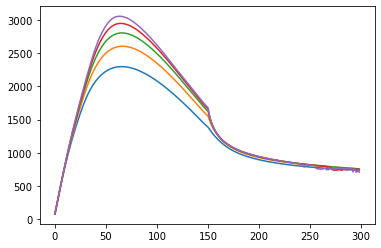

In [47]:
plt.plot(AccExp_Variation[0,:,0])
plt.plot(AccExp_Variation[0,:,1])
plt.plot(AccExp_Variation[0,:,2])
plt.plot(AccExp_Variation[0,:,3])

plt.plot(AccExp_Variation[0,:,4])

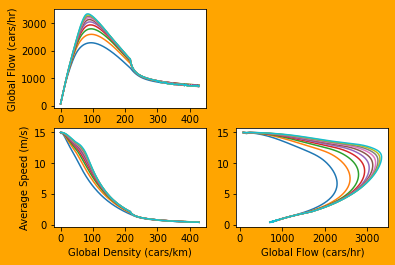

In [50]:
x_dens = np.linspace(0,214.28571428571428*2,299)

fundamentalfig2, axs = plt.subplots(2,2)
fundamentalfig2.set_facecolor('orange')
for jj in range(10):
    axs[0,0].plot(x_dens,AccExp_Variation[0,:,jj])
    axs[0,0].set_ylabel('Global Flow (cars/hr)')
    axs[1,0].plot(x_dens,AccExp_Variation[1,:,jj])
    axs[1,0].set_xlabel('Global Density (cars/km)')
    axs[1,0].set_ylabel('Average Speed (m/s)')
    axs[1,1].plot(AccExp_Variation[0,:,jj], AccExp_Variation[1,:,jj])
    axs[1,1].set_xlabel('Global Flow (cars/hr)')
    axs[0,1].axis('off')

In [ ]:
start = 1
stop = 150

In [ ]:
####################################################################
#          PARAMS
####################################################################
start_time=time.perf_counter()

L= 700        
steps_setup= 100               
splim = 15


des_speed=splim    
des_speed_inv=1/splim     
del_t= 0.1                   
acc_exp= 4                  
time_gap= 1               
min_gap= 2                  
comf_decel= 1.5               
acc_max= 1                 
length = 2                                          
 

#Parameter set-up
params=[]
params.append(des_speed_inv)
params.append(acc_exp)
params.append(time_gap)
params.append(comf_decel)
params.append(min_gap)
params.append(acc_max)
params.append(del_t)
params.append(length)
params.append(L)
####################################################################
#          PARAMETER SUMMARY
####################################################################
#  SETUP:
# acc exponent  = 4
# time_gap      = 1
# min space gap = 2
# comf decel    = 1.5
# max accel     = 1
# car length    = 2
####################################################################

In [ ]:
####################################################################
#   BASIC SIMULATION COLLECTING GLOBAL METRICS AND ITTERATING PARAMS
####################################################################
#  SETUP:
# iterating 1 to 150 cars, normally well past jam point
# 1000 steps at 0.1 secs 
# Road length 625m(force jam) with all cars starting even distance in first 600m
# 15 m/s speed limit
####################################################################
#  PARAMS TO ITERATE OVER:
# acc exponent
# min distance(safety gap)
# comf decel
# max acel
####################################################################


# PLAN:

# RUN BASIC SIM AS ABOVE OVER 100 VALUES OF DESIRED PARAM(FIRST ACC EXPONENT)

# SAVE RESULTS IN 3x150x100 MATRIX OUTSIDE TRIPLE NESTED FOR LOOP PREPPED FOR PLOTTING

# PLOT 50 EVENLY SPACED VALUES ON FUNDAMENTAL DIAGRAMS

# INSIDE SIM:

# DETERMINE SET OF 100 VALS IN global_flow_list[N,:] WITH LOWEST STANDARD DEVIATION AND AVERAGE THIS
# USE THIS VALUE IN SAVE RESULTS MATRIX,,,,,,100 vals used after observing behaviour of flow at fixed density

# COMPARE FINAL DATA OF PARAM WITH COVARIANCE

####################################################################
Min_Dist_itter = np.linspace(0.5,6,10)
ind = -1
L = 700
MinDist_Variation = np.zeros((2,149,10))

for xx in Min_Dist_itter:
    ind += 1
    params[4] = xx
    start = 1
    stop = 150
    #flow_global_list = np.zeros(stop-1,)
    #dens_global = np.zeros(stop-1)
    #avg_vel_global = []
    for N in range(start,stop):
        carflow = []
        caravvel = []
        vel= np.zeros(N)     
        pos = np.zeros(N)
        start = np.linspace(0,600,N)
        for j in range(N):
            pos[j]=start[j]       
        acc= np.zeros(N)      
        headway = np.zeros(N)
        dv = np.zeros(N)
        for i in range(N):
            DisGap = 0
            if i+1!=N:
                if pos[i]>(pos[i+1]-length):
                    DisGap = (pos[i+1]-length-pos[i]+L)
                elif pos[i]<(pos[i+1]-length):
                    DisGap = (pos[i+1]-length-pos[i])
                dv[i] = vel[i]-vel[i+1]
            else:
                if pos[i]>(pos[0]-length):
                    DisGap = (pos[0]-length-pos[i]+L)
                else:
                    DisGap = (pos[0]-length-pos[i])
                dv[i] = vel[i]-vel[0]
            headway[i] = DisGap
        posnew= np.zeros(N)        
        velnew= np.zeros(N)
        time_pass=0

        for i in range(steps):
            if i%500==0:
                print(f'step {i}')
            
            posnew, velnew, acc = upd_pos_vel(N, pos, vel, acc, headway, dv, posnew, velnew, params)

            pos, vel, headway, dv = update_cars(N, pos, vel, posnew, velnew, headway, dv, params)

            den,flo = flow_global(N,vel,L)
            #dens_global[N-1] = den
            carflow.append(flo)
            count = 0
            for n in range(N):
                count += vel[n]
            caravvel.append(count/N)    
            time_pass+=del_t
    
        eq_flow = low_stdv_find(carflow,100)
        MinDist_Variation[0,N-1,ind] = stat.mean(eq_flow)
        
        eq_vel = low_stdv_find(caravvel,100)
        MinDist_Variation[1,N-1,ind] = stat.mean(eq_vel)
           
        print(f'{N} completed')
    print(f'{ind} PARAM VARIO COMPILED')

np.save('Data Storage\Varying Min Distance Gap 4', MinDist_Variation)

In [ ]:
plt.plot(MinDist_Variation[0,:,0])
plt.plot(MinDist_Variation[0,:,1])
plt.plot(MinDist_Variation[0,:,2])
plt.plot(MinDist_Variation[0,:,3])
plt.plot(MinDist_Variation[0,:,4])

In [ ]:
####################################################################
#          PARAMS
####################################################################
start_time=time.perf_counter()

L= 700        
steps_setup= 100               
splim = 15


des_speed=splim    
des_speed_inv=1/splim     
del_t= 0.1                   
acc_exp= 4                  
time_gap= 1               
min_gap= 2                  
comf_decel= 1.5               
acc_max= 1                 
length = 2                                          
 

#Parameter set-up
params=[]
params.append(des_speed_inv)
params.append(acc_exp)
params.append(time_gap)
params.append(comf_decel)
params.append(min_gap)
params.append(acc_max)
params.append(del_t)
params.append(length)
params.append(L)
####################################################################
#          PARAMETER SUMMARY
####################################################################
#  SETUP:
# acc exponent  = 4
# time_gap      = 1
# min space gap = 2
# comf decel    = 1.5
# max accel     = 1
# car length    = 2
####################################################################

In [ ]:
####################################################################
#   BASIC SIMULATION COLLECTING GLOBAL METRICS AND ITTERATING PARAMS
####################################################################
#  SETUP:
# iterating 1 to 150 cars, normally well past jam point
# 1000 steps at 0.1 secs 
# Road length 625m(force jam) with all cars starting even distance in first 600m
# 15 m/s speed limit
####################################################################
#  PARAMS TO ITERATE OVER:
# acc exponent
# min distance(safety gap)
# comf decel
# max acel
####################################################################


# PLAN:

# RUN BASIC SIM AS ABOVE OVER 100 VALUES OF DESIRED PARAM(FIRST ACC EXPONENT)

# SAVE RESULTS IN 3x150x100 MATRIX OUTSIDE TRIPLE NESTED FOR LOOP PREPPED FOR PLOTTING

# PLOT 50 EVENLY SPACED VALUES ON FUNDAMENTAL DIAGRAMS

# INSIDE SIM:

# DETERMINE SET OF 100 VALS IN global_flow_list[N,:] WITH LOWEST STANDARD DEVIATION AND AVERAGE THIS
# USE THIS VALUE IN SAVE RESULTS MATRIX,,,,,,100 vals used after observing behaviour of flow at fixed density

# COMPARE FINAL DATA OF PARAM WITH COVARIANCE

####################################################################
Brake_Const_itter = np.linspace(0.5,6,10)
ind = -1
L = 700
BrakeConst_Variation = np.zeros((2,149,10))

for xx in Brake_Const_itter:
    ind += 1
    params[4] = xx
    start = 1
    stop = 150
    #flow_global_list = np.zeros(stop-1,)
    #dens_global = np.zeros(stop-1)
    #avg_vel_global = []
    for N in range(start,stop):
        carflow = []
        caravvel = []
        vel= np.zeros(N)     
        pos = np.zeros(N)
        start = np.linspace(0,600,N)
        for j in range(N):
            pos[j]=start[j]       
        acc= np.zeros(N)      
        headway = np.zeros(N)
        dv = np.zeros(N)
        for i in range(N):
            DisGap = 0
            if i+1!=N:
                if pos[i]>(pos[i+1]-length):
                    DisGap = (pos[i+1]-length-pos[i]+L)
                elif pos[i]<(pos[i+1]-length):
                    DisGap = (pos[i+1]-length-pos[i])
                dv[i] = vel[i]-vel[i+1]
            else:
                if pos[i]>(pos[0]-length):
                    DisGap = (pos[0]-length-pos[i]+L)
                else:
                    DisGap = (pos[0]-length-pos[i])
                dv[i] = vel[i]-vel[0]
            headway[i] = DisGap
        posnew= np.zeros(N)        
        velnew= np.zeros(N)
        time_pass=0

        for i in range(steps):
            if i%500==0:
                print(f'step {i}')
            
            posnew, velnew, acc = upd_pos_vel(N, pos, vel, acc, headway, dv, posnew, velnew, params)

            pos, vel, headway, dv = update_cars(N, pos, vel, posnew, velnew, headway, dv, params)

            den,flo = flow_global(N,vel,L)
            #dens_global[N-1] = den
            carflow.append(flo)
            count = 0
            for n in range(N):
                count += vel[n]
            caravvel.append(count/N)    
            time_pass+=del_t
    
        eq_flow = low_stdv_find(carflow,100)
        BrakeConst_Variation[0,N-1,ind] = stat.mean(eq_flow)
        
        eq_vel = low_stdv_find(caravvel,100)
        BrakeConst_Variation[1,N-1,ind] = stat.mean(eq_vel)
           
        print(f'{N} completed')
    print(f'{ind} PARAM VARIO COMPILED')

np.save('Data Storage\Varying Brake Constant 4', BrakeConst_Variation)

In [ ]:
plt.plot(BrakeConst_Variation[0,:,0])
plt.plot(BrakeConst_Variation[0,:,1])
plt.plot(BrakeConst_Variation[0,:,2])
plt.plot(BrakeConst_Variation[0,:,3])
plt.plot(BrakeConst_Variation[0,:,4])

In [ ]:
####################################################################
#          PARAMS
####################################################################
start_time=time.perf_counter()

L= 700        
steps_setup= 100               
splim = 15


des_speed=splim    
des_speed_inv=1/splim     
del_t= 0.1                   
acc_exp= 4                  
time_gap= 1               
min_gap= 2                  
comf_decel= 1.5               
acc_max= 1                 
length = 2                                          
 

#Parameter set-up
params=[]
params.append(des_speed_inv)
params.append(acc_exp)
params.append(time_gap)
params.append(comf_decel)
params.append(min_gap)
params.append(acc_max)
params.append(del_t)
params.append(length)
params.append(L)
####################################################################
#          PARAMETER SUMMARY
####################################################################
#  SETUP:
# acc exponent  = 4
# time_gap      = 1
# min space gap = 2
# comf decel    = 1.5
# max accel     = 1
# car length    = 2
####################################################################

In [ ]:
####################################################################
#   BASIC SIMULATION COLLECTING GLOBAL METRICS AND ITTERATING PARAMS
####################################################################
#  SETUP:
# iterating 1 to 150 cars, normally well past jam point
# 1000 steps at 0.1 secs 
# Road length 625m(force jam) with all cars starting even distance in first 600m
# 15 m/s speed limit
####################################################################
#  PARAMS TO ITERATE OVER:
# acc exponent
# min distance(safety gap)
# comf decel
# max acel
####################################################################


# PLAN:

# RUN BASIC SIM AS ABOVE OVER 100 VALUES OF DESIRED PARAM(FIRST ACC EXPONENT)

# SAVE RESULTS IN 3x150x100 MATRIX OUTSIDE TRIPLE NESTED FOR LOOP PREPPED FOR PLOTTING

# PLOT 50 EVENLY SPACED VALUES ON FUNDAMENTAL DIAGRAMS

# INSIDE SIM:

# DETERMINE SET OF 100 VALS IN global_flow_list[N,:] WITH LOWEST STANDARD DEVIATION AND AVERAGE THIS
# USE THIS VALUE IN SAVE RESULTS MATRIX,,,,,,100 vals used after observing behaviour of flow at fixed density

# COMPARE FINAL DATA OF PARAM WITH COVARIANCE

####################################################################
Max_Accel_itter = np.linspace(0.5,6,10)
ind = -1
L = 700
MaxAccel_Variation = np.zeros((2,149,10))

for xx in Max_Accel_itter:
    ind += 1
    params[4] = xx
    start = 1
    stop = 150
    #flow_global_list = np.zeros(stop-1,)
    #dens_global = np.zeros(stop-1)
    #avg_vel_global = []
    for N in range(start,stop):
        carflow = []
        caravvel = []
        vel= np.zeros(N)     
        pos = np.zeros(N)
        start = np.linspace(0,600,N)
        for j in range(N):
            pos[j]=start[j]       
        acc= np.zeros(N)      
        headway = np.zeros(N)
        dv = np.zeros(N)
        for i in range(N):
            DisGap = 0
            if i+1!=N:
                if pos[i]>(pos[i+1]-length):
                    DisGap = (pos[i+1]-length-pos[i]+L)
                elif pos[i]<(pos[i+1]-length):
                    DisGap = (pos[i+1]-length-pos[i])
                dv[i] = vel[i]-vel[i+1]
            else:
                if pos[i]>(pos[0]-length):
                    DisGap = (pos[0]-length-pos[i]+L)
                else:
                    DisGap = (pos[0]-length-pos[i])
                dv[i] = vel[i]-vel[0]
            headway[i] = DisGap
        posnew= np.zeros(N)        
        velnew= np.zeros(N)
        time_pass=0

        for i in range(steps):
            if i%500==0:
                print(f'step {i}')
            
            posnew, velnew, acc = upd_pos_vel(N, pos, vel, acc, headway, dv, posnew, velnew, params)

            pos, vel, headway, dv = update_cars(N, pos, vel, posnew, velnew, headway, dv, params)

            den,flo = flow_global(N,vel,L)
            #dens_global[N-1] = den
            carflow.append(flo)
            count = 0
            for n in range(N):
                count += vel[n]
            caravvel.append(count/N)    
            time_pass+=del_t
    
        eq_flow = low_stdv_find(carflow,100)
        MaxAccel_Variation[0,N-1,ind] = stat.mean(eq_flow)
        
        eq_vel = low_stdv_find(caravvel,100)
        MaxAccel_Variation[1,N-1,ind] = stat.mean(eq_vel)
           
        print(f'{N} completed')
    print(f'{ind} PARAM VARIO COMPILED')

np.save('Data Storage\Varying Max Acceleration 4', MaxAccel_Variation)

In [ ]:
plt.plot(MaxAccel_Variation[0,:,0])
plt.plot(MaxAccel_Variation[0,:,1])
plt.plot(MaxAccel_Variation[0,:,2])
plt.plot(MaxAccel_Variation[0,:,3])
plt.plot(MaxAccel_Variation[0,:,4])